In [1]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# open image and return np array 
 
def openIMG(img_path):
    im2 = Image.open(img_path)              
    im2 = np.array(im2) 
    return im2

In [67]:
def shift_image(X, dx, dy, pad_val):
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = pad_val
    elif dy<0:
        X[dy:, :] = pad_val
    if dx>0:
        X[:, :dx] = pad_val
    elif dx<0:
        X[:, dx:] = pad_val
    return X

(405, 405)


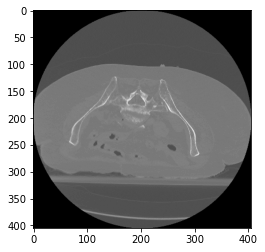

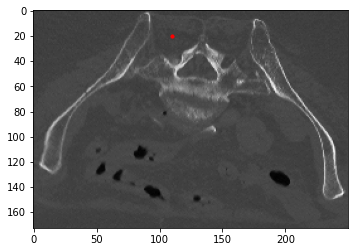

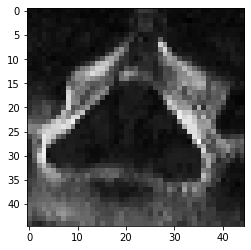

In [70]:
thresholded = openIMG('cadaver_slice_117_grey.png')
print(thresholded.shape)
plt.imshow(thresholded, cmap = 'gray')
plt.show()

cropped = thresholded[122:295, 62:312]
# cropped = np.pad(cropped, ((40, 40), (40, 40)), 'edge')

pad_val = np.mean(cropped[5:10, 5:10])
plt.imshow(cropped, cmap = 'gray')
x = 110
y = 20
plt.scatter(x, y, s=10, c='red', marker='o')
plt.show()


size = 45
plt.imshow(cropped[y:y+size, x:x+size], cmap = 'gray')
plt.show()


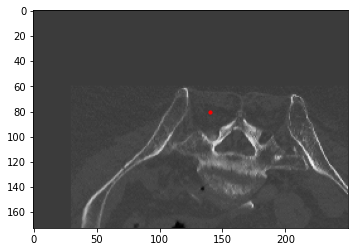

140
80


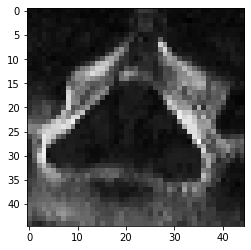

In [102]:
x_trans = 30
y_trans = 60
shifted_img = shift_image(cropped, x_trans, y_trans, pad_val)
plt.scatter(x+x_trans, y+y_trans, s=10, c='red', marker='o')
plt.imshow(shifted_img, cmap = 'gray')
plt.show()

new_x = x + x_trans 
new_y = y + y_trans 
print(new_x)
print(new_y)
plt.imshow(shifted_img[new_y:new_y+size, new_x:new_x+size], cmap = 'gray')
plt.show()


# new_shifted = shifted_img[y_trans:shifted_img.shape[0], x_trans:shifted_img.shape[1]]
# check = np.pad(new_shifted, ((45, 0), (45, 0)), 'edge')
# plt.imshow(check, cmap = 'gray')
# plt.show()


In [103]:
from PIL import Image
im = Image.fromarray(shifted_img)
# This Will Rotate Image By 60 Degree
im = im.rotate(0)
 
# im.show()

In [104]:
im.save(f"001_cropped_grayscale_x{new_x}_y{new_y}.png")

(405, 405)


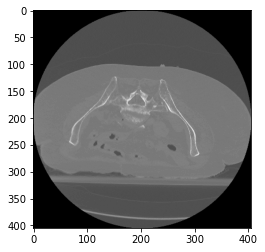

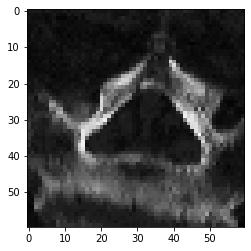

130.0661111111111


In [22]:
grayscale = openIMG('cadaver_slice_117_grey.png')
print(grayscale.shape)

plt.imshow(grayscale, cmap = 'gray')
plt.show()

plt.imshow(grayscale[x:x+60, y:y+60], cmap = 'gray')
plt.show()

print(np.mean(grayscale[x:x+60, y:y+60]))

In [5]:
# pickle load 
import pickle
with open(r'.\Conv-DQN_100.pkl', 'rb') as f:
    conv = pickle.load(f)

with open(r'.\FC-DQN_100.pkl', 'rb') as f:
    fc = pickle.load(f)

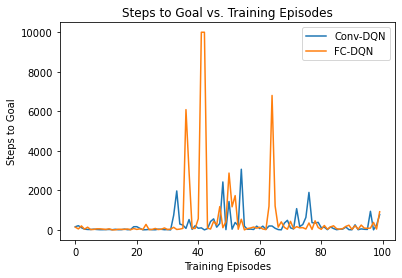

In [9]:
import matplotlib.pyplot as plt
plt.plot( range(len(conv)), conv, label = 'Conv-DQN')
plt.plot( range(len(fc)), fc, label = 'FC-DQN')
plt.title('Steps to Goal vs. Training Episodes')
plt.xlabel('Training Episodes')
plt.ylabel('Steps to Goal')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# length = len(fit.history['nb_episode_steps'])
length = len(train_num_steps)
fig = plt.figure()
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax.plot(range(length), train_num_steps, color="C0")
ax.set_xlabel("Episodes", color="C0")
ax.set_ylabel("Total Steps", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax2.scatter(range(length), train_episode_reward, color="C1")
ax2.axes.get_xaxis().set_visible(False)
ax2.yaxis.tick_right()
ax2.set_ylabel('Episode Reward', color="C1")
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="C1")
ax.set_title("Traditional Q-Learning Training \n Reward and Steps to Goal vs. Episodes")
fig.savefig(f"GrayScale_Distance_Traditional_Q_learn_training_{length}eps_1_{environment_type}_eps_decay_100")